# **Load Dataset & Library**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra 线性代数
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from PIL import Image
import matplotlib.pyplot as mpimg
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

'''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

# **Data Analysis**

In [2]:
train_df = pd.read_csv('Chest_xray_Corona_Metadata.csv')
train_df.shape #train_df有6列，5910行

(5910, 6)

In [3]:
train_df.head(5)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [4]:
train_df.info() #查询train_df的相关信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5910 non-null   int64 
 1   X_ray_image_name        5910 non-null   object
 2   Label                   5910 non-null   object
 3   Dataset_type            5910 non-null   object
 4   Label_2_Virus_category  69 non-null     object
 5   Label_1_Virus_category  4334 non-null   object
dtypes: int64(1), object(5)
memory usage: 277.2+ KB


## Missing Values

<Axes: >

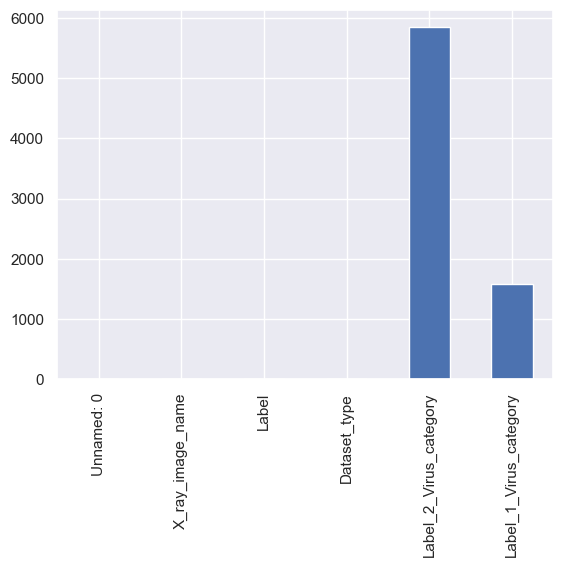

In [5]:
missing_vals = train_df.isnull().sum()  #统计所有空的(null)项
missing_vals.plot(kind = 'bar') #表格展示

In [6]:
# Noramal dataset or Null
train_df.dropna(how = 'all') #用于过滤数据中的缺失数据
                             #'all'：如果所有值均为NA，则删除该行或列
train_df.isnull().sum()

Unnamed: 0                   0
X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    5841
Label_1_Virus_category    1576
dtype: int64

In [7]:
#impute unknown to null data points, we don't wanna see those ugly null values 将未知值归零到零数据点，我们不想看到那些丑陋的零值
train_df.fillna('unknown', inplace=True)
train_df.isnull().sum()

Unnamed: 0                0
X_ray_image_name          0
Label                     0
Dataset_type              0
Label_2_Virus_category    0
Label_1_Virus_category    0
dtype: int64

In [8]:
#划分训练集和测试集
train_data = train_df[train_df['Dataset_type'] == 'TRAIN']  #训练集大小为5286
test_data = train_df[train_df['Dataset_type'] == 'TEST'] #测试集大小为624
assert train_data.shape[0] + test_data.shape[0] == train_df.shape[0]
print(f"Shape of train data : {train_data.shape}")
print(f"Shape of test data : {test_data.shape}")
test_data.sample(10)

Shape of train data : (5286, 6)
Shape of test data : (624, 6)


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5594,5617,person139_bacteria_664.jpeg,Pnemonia,TEST,unknown,bacteria
5425,5448,NORMAL2-IM-0273-0001.jpeg,Normal,TEST,unknown,unknown
5659,5682,person119_bacteria_568.jpeg,Pnemonia,TEST,unknown,bacteria
5840,5863,person22_virus_54.jpeg,Pnemonia,TEST,unknown,Virus
5857,5880,person174_bacteria_832.jpeg,Pnemonia,TEST,unknown,bacteria
5501,5524,NORMAL2-IM-0360-0001.jpeg,Normal,TEST,unknown,unknown
5521,5544,person1629_virus_2823.jpeg,Pnemonia,TEST,unknown,Virus
5509,5532,NORMAL2-IM-0349-0001.jpeg,Normal,TEST,unknown,unknown
5505,5528,NORMAL2-IM-0353-0001.jpeg,Normal,TEST,unknown,unknown
5564,5587,person151_bacteria_718.jpeg,Pnemonia,TEST,unknown,bacteria


In [9]:
print((train_df['Label_1_Virus_category']).value_counts())
print('--------------------------')
print((train_df['Label_2_Virus_category']).value_counts())
print('--------------------------')
print((train_df[train_df['Label']=='Normal']).value_counts())
print('--------------------------')
print((train_df[train_df['Label']=='Pnemonia']).value_counts())

bacteria          2777
unknown           1576
Virus             1555
Stress-Smoking       2
Name: Label_1_Virus_category, dtype: int64
--------------------------
unknown          5841
COVID-19           58
Streptococcus       5
SARS                4
ARDS                2
Name: Label_2_Virus_category, dtype: int64
--------------------------
Unnamed: 0  X_ray_image_name           Label   Dataset_type  Label_2_Virus_category  Label_1_Virus_category
0           IM-0128-0001.jpeg          Normal  TRAIN         unknown                 unknown                   1
1058        NORMAL2-IM-1044-0001.jpeg  Normal  TRAIN         unknown                 unknown                   1
1056        NORMAL2-IM-1046-0001.jpeg  Normal  TRAIN         unknown                 unknown                   1
1055        NORMAL2-IM-1047-0001.jpeg  Normal  TRAIN         unknown                 unknown                   1
1054        NORMAL2-IM-1048-0001.jpeg  Normal  TRAIN         unknown                 unknown      

In [39]:
plt.figure(figsize=(15,10)) #窗口长宽大小
sns.countplot(train_data['Label_2_Virus_category'])

ValueError: could not convert string to float: 'unknown'

<Figure size 1500x1000 with 0 Axes>

In [17]:
plt.figure(figsize=(15,10)) #窗口长宽大小
sns.countplot(train_data['Label_1_Virus_category'])

ValueError: could not convert string to float: 'unknown'

<Figure size 1500x1000 with 0 Axes>

In [10]:
test_img_dir = 'Coronahack-Chest-XRay-Dataset\test'
train_img_dir = 'Coronahack-Chest-XRay-Dataset\train'

sample_train_images = list(os.walk(train_img_dir))[0][2][:8]
sample_train_images = list(map(lambda x: os.path.join(train_img_dir, x), sample_train_images))

sample_test_images = list(os.walk(test_img_dir))[0][2][:8]
sample_test_images = list(map(lambda x: os.path.join(test_img_dir, x), sample_test_images))

IndexError: list index out of range

In [11]:
plt.figure(figsize = (10,10))
for iterator, filename in enumerate(sample_train_images):
    image = Image.open(filename)
    plt.subplot(4,2,iterator+1)
    plt.imshow(image, cmap=plt.cm.bone)

plt.tight_layout()

NameError: name 'sample_train_images' is not defined

<Figure size 1000x1000 with 0 Axes>

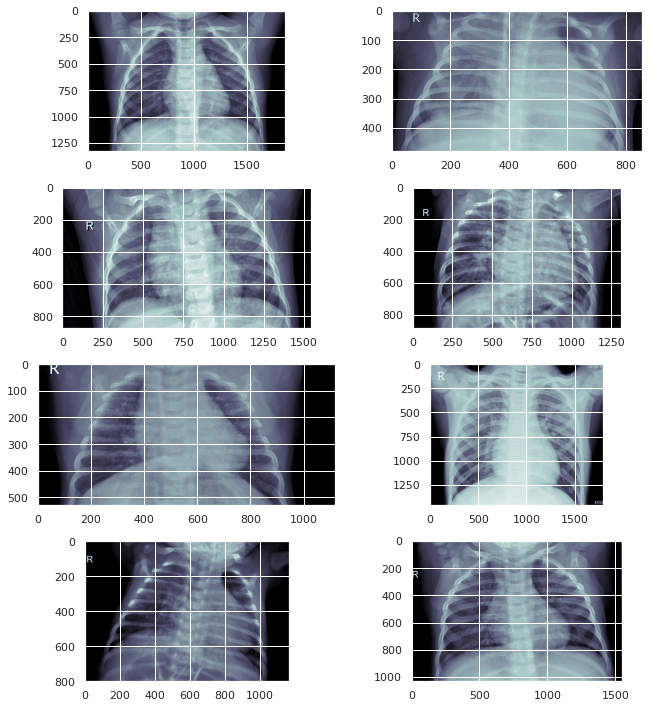

In [20]:
plt.figure(figsize = (10,10))
for iterator, filename in enumerate(sample_test_images):
    image = Image.open(filename)
    plt.subplot(4,2,iterator+1)
    plt.imshow(image, cmap=plt.cm.bone)

plt.tight_layout()

## Histogram analysis of Images 图像的直方图分析

### For Pnemonia cases 对于肺炎病例

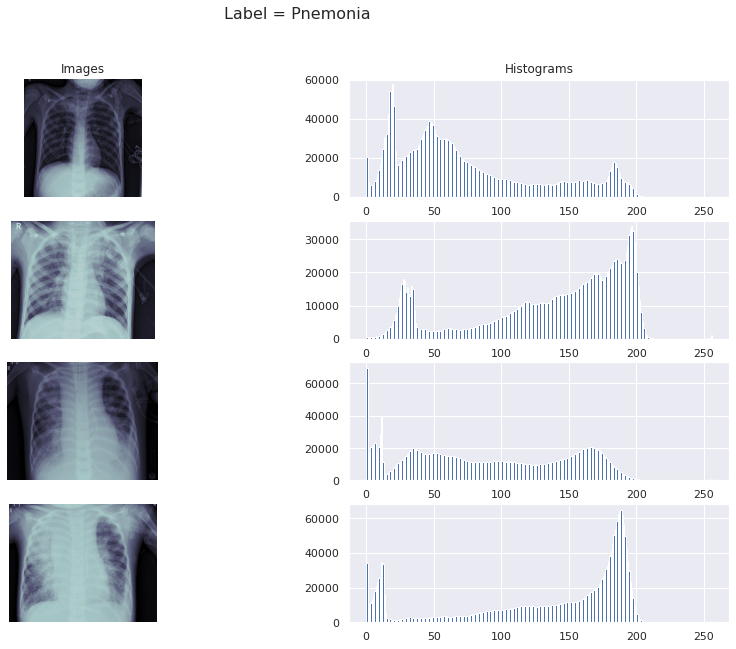

In [21]:
fig, ax = plt.subplots(4, 2, figsize=(15, 10))


pneumonia_path = train_data[train_data['Label']=='Pnemonia']['X_ray_image_name'].values

sample_covid_path = pneumonia_path[:4]
sample_covid_path = list(map(lambda x: os.path.join(train_img_dir, x), sample_covid_path))

for row, file in enumerate(sample_covid_path):
    image = plt.imread(file)
    ax[row, 0].imshow(image, cmap=plt.cm.bone)
    ax[row, 1].hist(image.ravel(), 256, [0,256])
    ax[row, 0].axis('off')
    if row == 0:
        ax[row, 0].set_title('Images')
        ax[row, 1].set_title('Histograms')
fig.suptitle('Label = Pnemonia', size=16)
plt.show()

### Normal Histogram images 正常情况的直方图

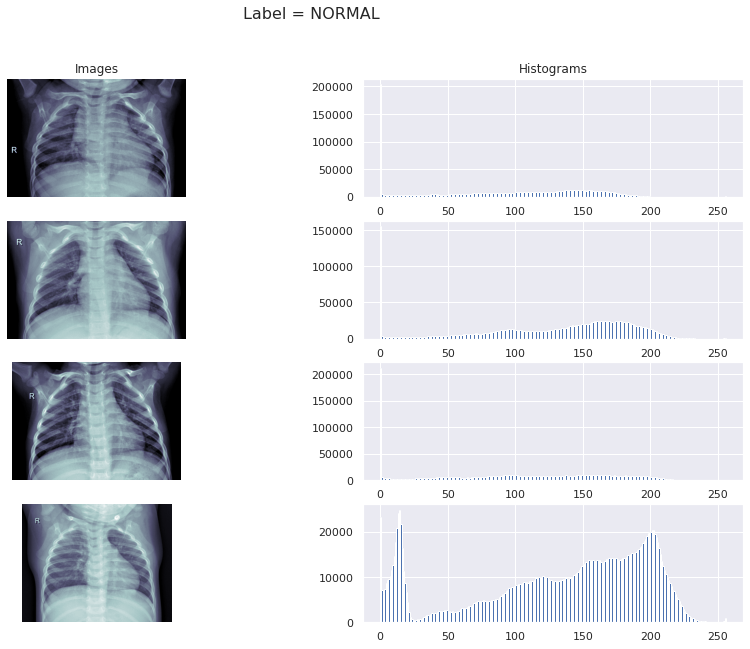

In [22]:
fig, ax = plt.subplots(4, 2, figsize=(15, 10))


normal_path = train_data[train_data['Label']=='Normal']['X_ray_image_name'].values

sample_normal_path = normal_path[:4]
sample_normal_path = list(map(lambda x: os.path.join(train_img_dir, x), sample_normal_path))

for row, file in enumerate(sample_normal_path):
    image = plt.imread(file)
    ax[row, 0].imshow(image, cmap=plt.cm.bone)
    ax[row, 1].hist(image.ravel(), 256, [0,256])
    ax[row, 0].axis('off')
    if row == 0:
        ax[row, 0].set_title('Images')
        ax[row, 1].set_title('Histograms')
fig.suptitle('Label = NORMAL', size=16)
plt.show()

## Split Train, Test data  拆分训练

In [12]:
train_data['class'] = train_data.Label.apply(lambda x: 'negative' if x=='Normal' else 'positive') #根据label进行分类：Normal是阴性negative
train_data['target'] = train_data.Label.apply(lambda x: 0 if x=='Normal' else 1)

test_data['class'] = test_data.Label.apply(lambda x: 'negative' if x=='Normal' else 'positive')
test_data['target'] = test_data.Label.apply(lambda x: 0 if x=='Normal' else 1)

Train_data
positive    3944
negative    1342
Name: class, dtype: int64

 Test_data
positive    390
negative    234
Name: class, dtype: int64


KeyError: 0

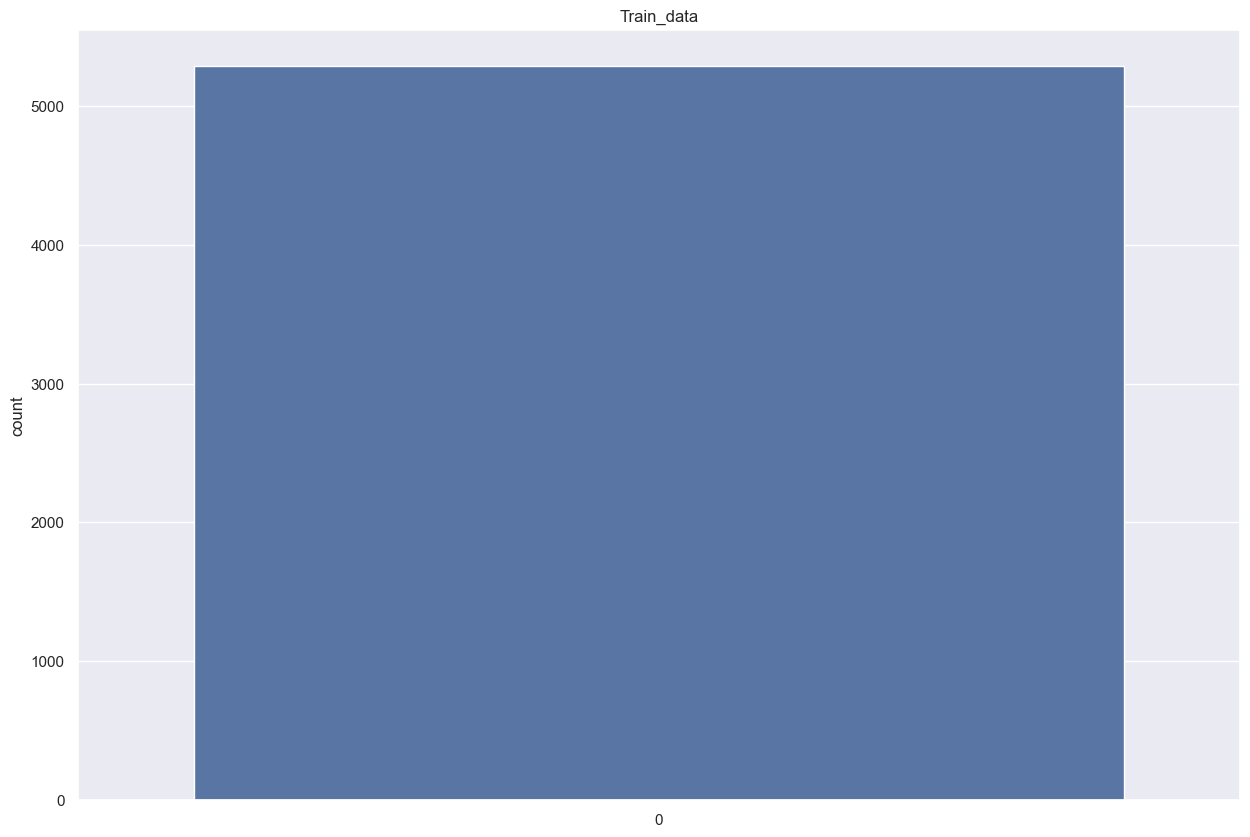

<Figure size 1500x1000 with 0 Axes>

In [13]:
# Get the only important features 获取唯一重要特征
train_data = train_data[['X_ray_image_name', 'class', 'target']]
test_data = test_data[['X_ray_image_name', 'class', 'target']]

print("Train_data")
print(train_data['class'].value_counts())

print("\n Test_data")
print(test_data['class'].value_counts())

plt.figure(figsize=(15,10))
sns.countplot(train_data['target']);
plt.title("Train_data")

plt.figure(figsize=(15,10))
sns.countplot(test_data['target']);
plt.title("Test_data")

In [25]:
def read_img(filename, size, path):
    img = image.load_img(os.path.join(path, filename), target_size=size)
    #convert image to array 将图像转换为数组
    img = img_to_array(img) / 255
    return img

In [26]:
def check_dim(dir,data):
    shape_set = {1:0,2:0,3:0,4:0}
    for x in tqdm(data):
        x = os.path.join(dir, x)
        img = plt.imread(x)

        shape_set[len(np.array(img).shape)] += 1
    print(shape_set)
    print("done")
check_dim(train_img_dir,train_data['X_ray_image_name'])
check_dim(test_img_dir,test_data['X_ray_image_name'])

100%|██████████| 5286/5286 [00:51<00:00, 102.26it/s]


{1: 0, 2: 4941, 3: 345, 4: 0}
done


100%|██████████| 624/624 [00:04<00:00, 146.36it/s]

{1: 0, 2: 624, 3: 0, 4: 0}
done


In [29]:
import torch
from torchvision.transforms import *
from torch.utils.data import Dataset, DataLoader
import cv2

class Xray_train_data(Dataset):
    def __init__(self,data):
        self.img_names = data.X_ray_image_name.values
        self.target = data.target.values
        self.dir = 'Coronahack-Chest-XRay-Dataset\train'
    
    def __len__(self):
        return len(self.target)
    
    def __getitem__(self,idx):
        img_path = os.path.join(self.dir,self.img_names[idx])
        img = torch.tensor(cv2.imread(img_path))
        target = torch.tensor(self.target[idx])
        return img, target

class Xray_test(Dataset):
    def __init__(self,data):
        self.img_names = data.X_ray_image_name.values
        self.target = data.target.values
        self.dir = 'Coronahack-Chest-XRay-Dataset\test'
    
    def __len__(self):
        return len(self.target)
    
    def __getitem__(self,idx):
        img_path = os.path.join(self.dir,self.img_names[idx])
        img = torch.tensor(cv2.imread(img_path))
        target = torch.tensor(self.target[idx])
        return img, target

In [30]:
    
class Xray_train(Dataset):
    def __init__(self,data):
        self.img_names = data.X_ray_image_name.values
        self.target = data.target.values
    
    def __len__(self):
        return len(self.target)
    
    def __getitem__(self,idx):
        return img, target

In [32]:
from sklearn.model_selection import train_test_split
from torch.utils.data import SubsetRandomSampler

train_ = Xray_train_data(train_data)
test = Xray_test(test_data)

train_idx, val_idx = train_test_split(range(len(train_)),test_size=len(test),shuffle=True,stratify=train_.target,random_state=0)

In [33]:
def calculate_norm(dataset):
    # dataset의 axis=1, 2에 대한 평균 산출
    mean_ = np.array([np.mean(x.numpy(), axis=(1, 2)) for x, _ in dataset])
    # r, g, b 채널에 대한 각각의 평균 산출
    mean_r = mean_[:, 0].mean()
    mean_g = mean_[:, 1].mean()
    mean_b = mean_[:, 2].mean()

    # dataset의 axis=1, 2에 대한 표준편차 산출
    std_ = np.array([np.std(x.numpy(), axis=(1, 2)) for x, _ in dataset])
    # r, g, b 채널에 대한 각각의 표준편차 산출
    std_r = std_[:, 0].mean()
    std_g = std_[:, 1].mean()
    std_b = std_[:, 2].mean()
    
    return (mean_r, mean_g, mean_b), (std_r, std_g, std_b)

## Augmentation Dataset 增强数据集
 
### Pytorch dataset augmentation PyTorch数据集增强

In [44]:
import torch
from torch.utils.data import Dataset

torch.manual_seed(0) #设置PyTorch的随机数种子为0。设置随机数种子可以让程序在每次运行时生成相同的随机数，这样可以保证模型训练的可重复性。

class PneumoniaDataset(Dataset):
    def __init__(self, img, data_type='train'):
        path2data = os.path.join()

In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's severaal helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from PIL import Image
import matplotlib.pyplot as mpimg
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

'''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [46]:
import pandas as pd
df = pd.read_csv("Chest_xray_Corona_Metadata.csv")
df

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
5905,5928,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,5929,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,5930,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,5931,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus


In [47]:
df.Label.unique()

array(['Normal', 'Pnemonia'], dtype=object)

In [48]:
print(f"Train num : {len(df[df['Dataset_type']=='TRAIN'])}\nTest num : {len(df[df['Dataset_type']=='TEST'])}")

Train num : 5286
Test num : 624


In [49]:
import os
import pandas as pd
import time
import shutil

PATH_TRAIN = "Coronahack-Chest-XRay-Dataset\train"
PATH_TEST = "Coronahack-Chest-XRay-Dataset\test"

Train_Total_Imgs = len(os.listdir(PATH_TRAIN))
Test_Total_Imgs = len(os.listdir(PATH_TEST))

Train_normal = 0
Train_infected = 0
Test_normal = 0
Test_infected = 0

img = df["X_ray_image_name"]
label = df["Label"]
image_type = df["Dataset_type"]
Train_all_dir = os.listdir(PATH_TRAIN)
Test_all_dir = os.listdir(PATH_TEST)

os.mkdir("train")
os.mkdir('train/Infected')
os.mkdir("train/Normal")
os.mkdir("test")
os.mkdir('test/Infected')
os.mkdir("test/Normal")

Train_wrong_info = 0  # Checking if the provided list maps the images correctly
Test_wrong_info = 0  # Checking if the provided list maps the images correctly

# Moving the train images to designated folders

for idx in range(len(image_type)):
    if image_type[idx] == "TRAIN":
        if img[idx] in Train_all_dir: # Make sure that all images in Chest_xray_Corona_Metadata.csv is mapped
            if label[idx] == "Normal":
                shutil.copy(
                    PATH_TRAIN + "/" + img[idx], "train/Normal/" + img[idx]
                )
                Train_normal += 1

            else:

                shutil.copy(
                    PATH_TRAIN + "/" + img[idx], "train/Infected/" + img[idx]
                )
                Train_infected += 1

        else:
            Train_wrong_info += 1
    else:
        if img[idx] in Test_all_dir: # Make sure that all images in Chest_xray_Corona_Metadata.csv is mapped
            if label[idx] == "Normal":
                shutil.copy(
                    PATH_TEST + "/" + img[idx], "test/Normal/" + img[idx]
                )
                Test_normal += 1

            else:

                shutil.copy(
                    PATH_TEST + "/" + img[idx], "test/Infected/" + img[idx]
                )
                Test_infected += 1

        else:
            Test_wrong_info += 1

print(f"(TRAIN DATASET) X-ray of Normal patients: {Train_normal} \n(TRAIN DATASET) X-ray of Infected patients : {Train_infected} \n(TRAIN DATASET) : {Train_normal+Train_infected} wrong_info : {Train_wrong_info}")
print(f"(TEST DATASET) X-ray of Normal patients: {Test_normal} \n(TEST DATASET) X-ray of Infected patients : {Test_infected} \n(TEST DATASET) : {Test_normal+Test_infected} wrong_info : {Test_wrong_info}")

OSError: [WinError 123] 文件名、目录名或卷标语法不正确。: 'Coronahack-Chest-XRay-Dataset\train'

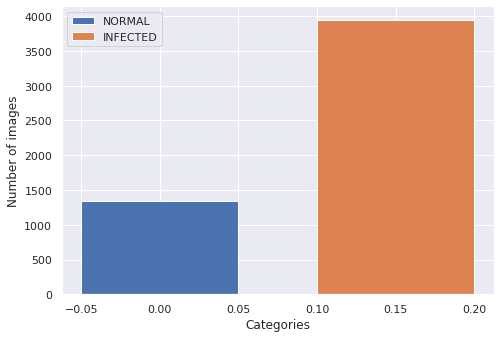

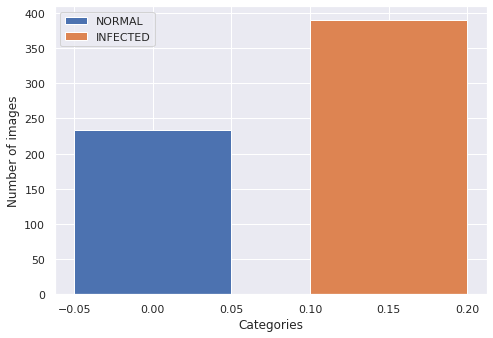

In [40]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
categories = ["NORMAL", "INFECTED"]
number_of_imgs = [Train_normal, Train_infected]
ax.bar(0, number_of_imgs[0], width=0.1)
ax.bar(0.15, number_of_imgs[1], width=0.1)
ax.legend(labels=categories)
ax.set_ylabel("Number of images")
ax.set_xlabel("Categories")
plt.show()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
categories = ["NORMAL", "INFECTED"]
number_of_imgs = [Test_normal, Test_infected]
ax.bar(0, number_of_imgs[0], width=0.1)
ax.bar(0.15, number_of_imgs[1], width=0.1)
ax.legend(labels=categories)
ax.set_ylabel("Number of images")
ax.set_xlabel("Categories")
plt.show()

In [41]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        n = 0
        for f in files:
            n = n+1
            if n>5:
                print('{}{}'.format(subindent, f),end = "  ...... \n")
                break
            print('{}{}'.format(subindent, f))

print("Input : ")
list_files("../input/coronahack-chest-xraydataset")
print("\nOutput : ")
list_files("./")

Input : 

Output : 
/
    Chest_xray_Corona_dataset_Summary.csv
    pneumonia-detection.ipynb
    Chest_xray_Corona_Metadata.csv
train/
    Infected/
        person783_bacteria_2687.jpeg
        person1625_bacteria_4290.jpeg
        person290_bacteria_1372.jpeg
        person281_bacteria_1324.jpeg
        person354_bacteria_1633.jpeg
        person383_virus_767.jpeg  ...... 
    Normal/
        NORMAL2-IM-0820-0001.jpeg
        NORMAL2-IM-1260-0001.jpeg
        NORMAL2-IM-0491-0001.jpeg
        NORMAL2-IM-1122-0001.jpeg
        NORMAL2-IM-0402-0001.jpeg
        IM-0117-0001.jpeg  ...... 
.ipynb_checkpoints/
    pneumonia-detection-checkpoint.ipynb
    Chest_xray_Corona_Metadata-checkpoint.csv
test/
    Infected/
        person161_bacteria_759.jpeg
        person130_bacteria_623.jpeg
        person1633_virus_2829.jpeg
        person161_bacteria_762.jpeg
        person100_bacteria_478.jpeg
        person83_bacteria_411.jpeg  ...... 
    Normal/
        IM-0099-0001.jpeg
        IM-0110-0

### **Exploring train dataset**
Whenever you see an area of increased density within the lung, it must be the result of one of these four patterns.
每当你看到肺部密度增加的区域时，一定是这四种模式之一的结果。
1. **Consolidation** - any pathologic process that fills the alveoli with fluid, pus, blood, cells (including tumor cells) or other substances resulting in lobar, diffuse or multifocal ill-defined opacities.
肺泡内充满液体、脓液、血液、细胞（包括肿瘤细胞）或其他物质的任何病理过程，导致大叶性、弥漫性或多灶性不明混浊。

2. **Interstitial** - involvement of the supporting tissue of the lung parenchyma resulting in fine or coarse reticular opacities or small nodules.肺实质的支持组织受累，导致细或粗的网状混浊或小结节。

3. **Nodule or mass** - any space occupying lesion either solitary or multiple.任何单独或多发的占位性病变。

4. **Atelectasis** - collapse of a part of the lung due to a decrease in the amount of air in the alveoli resulting in volume loss and increased density.由于肺泡中的空气量减少而导致肺的一部分塌陷，从而导致体积损失和密度增加。

![Pneumonia image](https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2013/08/26/10/01/ds00135_im00621_pnuesmal_gif.png)

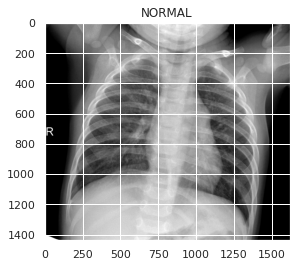

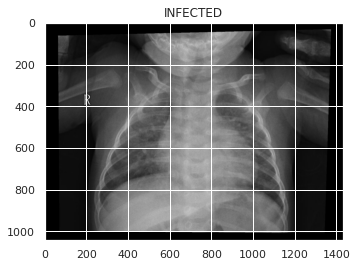

In [42]:
import cv2

normal_sample = cv2.imread("train/Normal/"+os.listdir("train/Normal")[0])
infected_sample = cv2.imread("train/Infected/"+os.listdir("train/Infected")[0])

plt.imshow(normal_sample)
plt.title("NORMAL")
plt.show()

plt.imshow(infected_sample)
plt.title("INFECTED")
plt.show()

**The difference can be seen with different visualizations below**

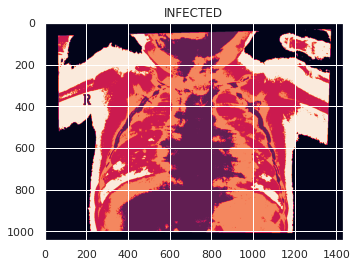

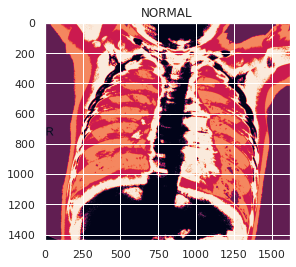

In [43]:
from sklearn import cluster
import numpy as np

kmeans = cluster.KMeans(5)
dims = np.shape(infected_sample)
pixel_matrix = np.reshape(infected_sample, (dims[0] * dims[1], dims[2]))
clustered = kmeans.fit_predict(pixel_matrix)


clustered_img = np.reshape(clustered, (dims[0], dims[1]))
plt.imshow(clustered_img)
plt.title("INFECTED")
plt.show()

kmeans = cluster.KMeans(5)
dims = np.shape(normal_sample)
pixel_matrix = np.reshape(normal_sample, (dims[0] * dims[1], dims[2]))
clustered = kmeans.fit_predict(pixel_matrix)


clustered_img = np.reshape(clustered, (dims[0], dims[1]))
plt.imshow(clustered_img)
plt.title("NORMAL")
plt.show()

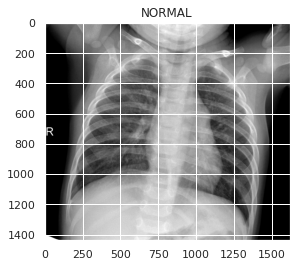

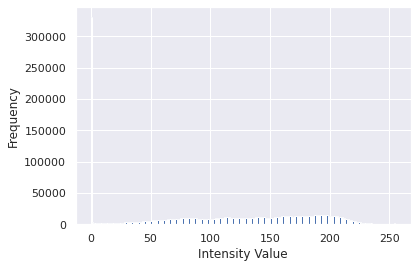

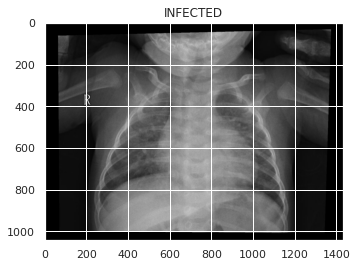

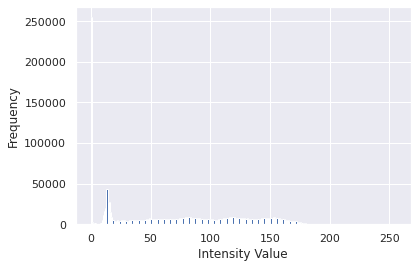

In [45]:
from skimage import io
import matplotlib.pyplot as plt

plt.imshow(normal_sample)
plt.title("NORMAL")
plt.show()

image = io.imread("train/Normal/"+os.listdir("train/Normal")[0])
ax = plt.hist(image.ravel(), bins = 256)
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

plt.imshow(infected_sample)
plt.title("INFECTED")
plt.show()

image = io.imread("train/Infected/"+os.listdir("train/Infected")[0])
ax = plt.hist(image.ravel(), bins = 256)
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

### Initializing the data loader

vgg16 pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224.vgg16预训练模型期望以相同方式归一化的输入图像，即形状（3 x H x W）的3通道RGB图像的小批量，其中H和W预计至少为224。

The images have to be loaded in to a range of [0, 1] and then normalized using:
图像必须加载到[0，1]的范围内，然后使用以下方法进行归一化：

**mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]**
We are applying augmentation like random rotation , horizontal and vertical flips to make sure the model doesn't overfit or learn the wrong features.我们正在应用增强，如随机旋转、水平和垂直翻转，以确保模型不会过度拟合或学习错误的特征。

Another tranforms such as crop, sheer are not proper this dataset. (~XAI)另一种形式，如crop、sheer，不适合这个数据集。（~XAI）

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import time
import torchvision
from PIL import ImageFile
import matplotlib.pyplot as plt
import cv2

ModuleNotFoundError: No module named 'cv2'

In [47]:
ImageFile.LOAD_TRUNCATED_IMAGES = True # To prevent error during loading broken images

PATH_TRAIN = "train"
PATH_TEST  = "test"
EPOCHS = 10
BATCH_SIZE = 32
TOTAL_SIZE = len(os.listdir(PATH_TRAIN + "/Normal")) + len(
    os.listdir(PATH_TRAIN + "/Infected")
)
TOTAL_TEST_SIZE = len(os.listdir(PATH_TEST + "/Normal")) + len(
    os.listdir(PATH_TEST + "/Infected")
)
STEPS_PER_EPOCH = TOTAL_SIZE // BATCH_SIZE
STEPS_PER_TEST_EPOCH = TOTAL_TEST_SIZE // BATCH_SIZE
IMAGE_H, IMAGE_W = 224, 224

In [48]:
transform = torchvision.transforms.Compose(
    [  # Applying Augmentation
        torchvision.transforms.Resize((IMAGE_H, IMAGE_W)),
        torchvision.transforms.RandomHorizontalFlip(p=0.5),
        torchvision.transforms.RandomVerticalFlip(p=0.5),
        torchvision.transforms.RandomRotation(30),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        ),
    ]
)  # Normalizing data

# Intitalizing the train data loader and applying the transformations 初始化训练数据、应用转换器

train_dataset = torchvision.datasets.ImageFolder(root=PATH_TRAIN, transform=transform)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=BATCH_SIZE, num_workers=1, shuffle=True
)

# Intitalizing the test data loader

test_dataset = torchvision.datasets.ImageFolder(
    root=PATH_TEST, transform=transform
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=BATCH_SIZE, num_workers=1, shuffle=True
)

### Initializing pretrained resnet18 model

![ResNet Contribution](https://d2l.ai/_images/residual-block.svg)

ResNet, short for Residual Networks is a classic neural network used as a backbone for many computer vision tasks. This model was the winner of ImageNet challenge in 2015. The fundamental breakthrough with ResNet was it allowed us to train extremely deep neural networks with 150+layers successfully. Prior to ResNet training very deep neural networks was difficult due to the problem of vanishing gradients. However, increasing network depth does not work by simply stacking layers together. Deep networks are hard to train because of the notorious vanishing gradient problem — as the gradient is back-propagated to earlier layers, repeated multiplication may make the gradient extremely small. As a result, as the network goes deeper, its performance gets saturated or even starts degrading rapidly.
残差网络的缩写ResNet是一种经典的神经网络，用作许多计算机视觉任务的主干。该模型是2015年ImageNet挑战赛的获胜者。ResNet的根本突破是它使我们能够成功地训练具有150多层的极深层神经网络。在ResNet之前，由于梯度消失的问题，很深的神经网络训练是困难的。然而，通过简单地将层堆叠在一起来增加网络深度是行不通的。由于臭名昭著的消失梯度问题，深度网络很难训练——当梯度反向传播到更早的层时，重复乘法可能会使梯度极小。因此，随着网络的深入，其性能变得饱和，甚至开始迅速下降。

### Load ResNet18 (No pretrained)

In [49]:
model = torchvision.models.resnet18(False)  # Initializing resnet18
feature = model.fc.in_features # Getting last layer's output features
model.fc = nn.Linear(feature, 2) # Modifying the last layer accordng to our need

### Initializing optimizers and loss function 

We will also specify the learning rate of the optimiser, here in this case it is set at 0.0001. If our training is bouncing a lot on epochs then we need to decrease the learning rate so that we can reach global minima.我们还将指定优化器的学习率，在这种情况下，它被设置为0.0001。如果我们的训练在时代上有很大的跳跃，那么我们需要降低学习率，这样我们才能达到全局最小值。

In [50]:
# Fix random seed
import torch
import random
import torch.backends.cudnn as cudnn
import numpy as np
from tqdm import tqdm

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
np.random.seed(0)
cudnn.benchmark = False
cudnn.deterministic = True
random.seed(0)

In [51]:
#  Returns a bool indicating if CUDA is currently available.
print(f"CUDA avaliable : {torch.cuda.is_available()}")
 
#  Returns the index of a currently selected device.
print(f"CUDA device num : {torch.cuda.current_device()}")
 
#  Returns the number of GPUs available.
print(f"Entire CUDA nums : {torch.cuda.device_count()}")
 
#  Gets the name of a device.
print(f"Device name : {torch.cuda.get_device_name(0)}")
 
#  Context-manager that changes the selected device.
#  Device (torch.device or int) – device index to select. 
print(torch.cuda.device(0))

CUDA avaliable : True
CUDA device num : 0
Entire CUDA nums : 1
Device name : NVIDIA GeForce RTX 3090


In [52]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)  # Sending model to device
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)  # lr should be kept low so that the pre-trained weights don't change easily

AdamW is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.AdamW是一种优化算法，可以代替经典的随机梯度下降过程，在训练数据的基础上迭代更新网络权重。

The authors describe AdamW as combining the advantages of two other extensions of stochastic gradient descent. Specifically:作者将AdamW描述为结合了随机梯度下降的另外两个扩展的优点。明确地：

1. Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).自适应梯度算法（AdaGrad），保持每参数学习率，提高稀疏梯度问题（如自然语言和计算机视觉问题）的性能。
2. Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).均方根传播（RMSProp），它还保持基于权重的梯度的最近幅度的平均值（例如，它的变化速度）调整的每个参数的学习率。这意味着该算法在在线和非平稳问题（例如噪声）上表现良好。

## Training the model

In [53]:
def get_test():
    test_loss = []

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    for batch_idx, (data, label) in enumerate(test_loader):
        if batch_idx == STEPS_PER_TEST_EPOCH:
            break

        # Model is used to predict the test data so we are switching off the gradient

        with torch.no_grad():
            test_correct = 0
            test_len = 0
            
            data = data.to(device)
            label = label.long().to(device)
            output = model(data)
            criterion = nn.CrossEntropyLoss()
            loss = criterion(output, label)

            # Note that optimizer is not used because the model shouldn't learn the test dataset
            pred = torch.argmax(F.softmax(output, dim=1),dim=1)
            correct = pred.eq(label)
            
            test_len += len(label)
            test_correct += correct.sum().item()

        test_loss.append(float(loss.detach().cpu()))
    print("CORRECT: " + str(test_correct), "INCORRECT: " + str(test_len - test_correct),"TEST ACCURACY: "+str(test_correct/test_len))
    return (
            test_correct/test_len,
            sum(test_loss)/len(test_loss),
    )

In [54]:
avg_test_loss_history = []
avg_test_accuracy_history = []
avg_train_loss_history = []
avg_train_accuracy_history = []

loss_history = []
accuracy_history = []

new_best = 0

for epoch in tqdm(range(EPOCHS)):

    print(f'======== Epoch {epoch+1} / {EPOCHS} ========')

    for batch_idx, (data, label) in enumerate(train_loader):
        if batch_idx == STEPS_PER_EPOCH:
            break
        optimizer.zero_grad()  # Resetting gradients after each optimizations
        
        train_len = 0
        train_correct = 0
        
        # Sending input , label to device
        data = data.to(device) 
        label = label.to(device)
        output = model(data)
        loss = criterion(output, label.reshape((BATCH_SIZE,)).long())
        loss_history.append(loss.detach().cpu())
        
        # The loss variable has gradient attached to it so we are removing it so that it can be used to plot graphs
        loss.backward()
        optimizer.step()  # Optimizing the model

        # Checking train accuracy
        
        pred = torch.argmax(F.softmax(output, dim=1),dim=1)
        correct = pred.eq(label)

        train_len += len(label)
        train_correct += correct.sum().item()
        

        print(
            "\r Epoch "
            + str(epoch)
            + " Minibatch: "
            + str(batch_idx)
            + "/"
            + str(STEPS_PER_EPOCH)
            + " Loss: "
            + str(loss_history[-1]),
            end = ""
            
        )
        
        accuracy_history.append(train_correct/train_len)

    print(
        " \n Epoch "
        + str(epoch)
        + " Loss "
        + str(sum(loss_history[-STEPS_PER_EPOCH:]) / STEPS_PER_EPOCH)
        + " \n Max Loss: "
        + str(max(loss_history[-STEPS_PER_EPOCH:]))
        + " Min Loss: "
        + str(min(loss_history[-STEPS_PER_EPOCH:]))
        + " Train Accuracy: "
        + str(int(sum(accuracy_history[-STEPS_PER_EPOCH:]) / STEPS_PER_EPOCH * 100))
    )
    
    avg_train_loss_history.append(sum(loss_history[-STEPS_PER_EPOCH:]) / STEPS_PER_EPOCH)
    avg_train_accuracy_history.append(sum(accuracy_history[-STEPS_PER_EPOCH:]) / STEPS_PER_EPOCH)
    
    test_acc , test_loss  = get_test()
    print("ACCURACY : "+str(test_acc),"LOSS : "+str(test_loss))
    
    avg_test_accuracy_history.append(test_acc)
    avg_train_loss_history.append(test_loss)
    
    if test_acc>new_best: 
        new_best = test_acc
        torch.save(model.state_dict(), "./model.pth") # Saving our best model

  0%|          | 0/10 [00:00<?, ?it/s]

======== Epoch 1 / 10 ========
 Epoch 0 Minibatch: 164/165 Loss: tensor(0.1645) 
 Epoch 0 Loss tensor(0.2420) 
 Max Loss: tensor(0.6978) Min Loss: tensor(0.0372) Train Accuracy: 89


 10%|█         | 1/10 [02:14<20:11, 134.56s/it]

CORRECT: 20 INCORRECT: 12 TEST ACCURACY: 0.625
ACCURACY : 0.625 LOSS : 0.5416431913250371
======== Epoch 2 / 10 ========
 Epoch 1 Minibatch: 164/165 Loss: tensor(0.0941) 
 Epoch 1 Loss tensor(0.1550) 
 Max Loss: tensor(0.4555) Min Loss: tensor(0.0265) Train Accuracy: 93


 20%|██        | 2/10 [04:24<17:35, 131.96s/it]

CORRECT: 24 INCORRECT: 8 TEST ACCURACY: 0.75
ACCURACY : 0.75 LOSS : 0.4419065933478506
======== Epoch 3 / 10 ========
 Epoch 2 Minibatch: 164/165 Loss: tensor(0.0583) 
 Epoch 2 Loss tensor(0.1229) 
 Max Loss: tensor(0.4931) Min Loss: tensor(0.0173) Train Accuracy: 95


 30%|███       | 3/10 [06:29<15:01, 128.75s/it]

CORRECT: 27 INCORRECT: 5 TEST ACCURACY: 0.84375
ACCURACY : 0.84375 LOSS : 0.5395444137485403
======== Epoch 4 / 10 ========
 Epoch 3 Minibatch: 164/165 Loss: tensor(0.0405) 
 Epoch 3 Loss tensor(0.1191) 
 Max Loss: tensor(0.5146) Min Loss: tensor(0.0144) Train Accuracy: 95


 40%|████      | 4/10 [08:29<12:31, 125.17s/it]

CORRECT: 28 INCORRECT: 4 TEST ACCURACY: 0.875
ACCURACY : 0.875 LOSS : 0.5193954714034733
======== Epoch 5 / 10 ========
 Epoch 4 Minibatch: 164/165 Loss: tensor(0.1117) 
 Epoch 4 Loss tensor(0.1115) 
 Max Loss: tensor(0.4974) Min Loss: tensor(0.0133) Train Accuracy: 95


 50%|█████     | 5/10 [10:30<10:18, 123.70s/it]

CORRECT: 29 INCORRECT: 3 TEST ACCURACY: 0.90625
ACCURACY : 0.90625 LOSS : 0.4992130171311529
======== Epoch 6 / 10 ========
 Epoch 5 Minibatch: 164/165 Loss: tensor(0.0701) 
 Epoch 5 Loss tensor(0.1107) 
 Max Loss: tensor(0.4047) Min Loss: tensor(0.0087) Train Accuracy: 95


 60%|██████    | 6/10 [12:30<08:09, 122.41s/it]

CORRECT: 29 INCORRECT: 3 TEST ACCURACY: 0.90625
ACCURACY : 0.90625 LOSS : 0.6530480306399497
======== Epoch 7 / 10 ========
 Epoch 6 Minibatch: 164/165 Loss: tensor(0.0748) 
 Epoch 6 Loss tensor(0.0940) 
 Max Loss: tensor(0.4799) Min Loss: tensor(0.0062) Train Accuracy: 96


 70%|███████   | 7/10 [14:30<06:04, 121.55s/it]

CORRECT: 26 INCORRECT: 6 TEST ACCURACY: 0.8125
ACCURACY : 0.8125 LOSS : 0.6841884161296644
======== Epoch 8 / 10 ========
 Epoch 7 Minibatch: 164/165 Loss: tensor(0.1660) 
 Epoch 7 Loss tensor(0.0947) 
 Max Loss: tensor(0.3695) Min Loss: tensor(0.0059) Train Accuracy: 96


 80%|████████  | 8/10 [16:28<04:00, 120.45s/it]

CORRECT: 30 INCORRECT: 2 TEST ACCURACY: 0.9375
ACCURACY : 0.9375 LOSS : 0.44269155161945445
======== Epoch 9 / 10 ========
 Epoch 8 Minibatch: 164/165 Loss: tensor(0.0431) 
 Epoch 8 Loss tensor(0.0849) 
 Max Loss: tensor(0.3296) Min Loss: tensor(0.0070) Train Accuracy: 96


 90%|█████████ | 9/10 [18:24<01:59, 119.09s/it]

CORRECT: 27 INCORRECT: 5 TEST ACCURACY: 0.84375
ACCURACY : 0.84375 LOSS : 0.5755499342554494
======== Epoch 10 / 10 ========
 Epoch 9 Minibatch: 164/165 Loss: tensor(0.0605) 
 Epoch 9 Loss tensor(0.0847) 
 Max Loss: tensor(0.4181) Min Loss: tensor(0.0076) Train Accuracy: 96


100%|██████████| 10/10 [20:21<00:00, 122.15s/it]

CORRECT: 28 INCORRECT: 4 TEST ACCURACY: 0.875
ACCURACY : 0.875 LOSS : 0.541113785222957


In [55]:
torch.save(model.state_dict(), "./model.pth")
print("Best Accuracy : ",new_best)

Best Accuracy :  0.9375


In [56]:
for i in avg_train_loss_history:
    print(i)

tensor(0.2420)
0.5416431913250371
tensor(0.1550)
0.4419065933478506
tensor(0.1229)
0.5395444137485403
tensor(0.1191)
0.5193954714034733
tensor(0.1115)
0.4992130171311529
tensor(0.1107)
0.6530480306399497
tensor(0.0940)
0.6841884161296644
tensor(0.0947)
0.44269155161945445
tensor(0.0849)
0.5755499342554494
tensor(0.0847)
0.541113785222957


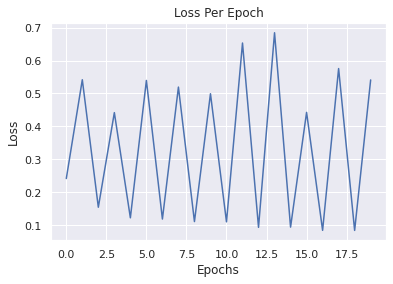

In [57]:
plt.plot(avg_train_loss_history ,label = "Train")
plt.plot(avg_test_loss_history , label = "Test")
plt.title('Loss Per Epoch')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig('full_result.png')
plt.show()

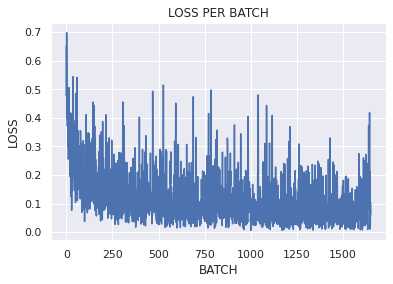

In [58]:
plt.plot(loss_history)
plt.title('LOSS PER BATCH')
plt.xlabel("BATCH")
plt.ylabel("LOSS")
plt.savefig('batch_result.png')
plt.show()

## Accuracy during training

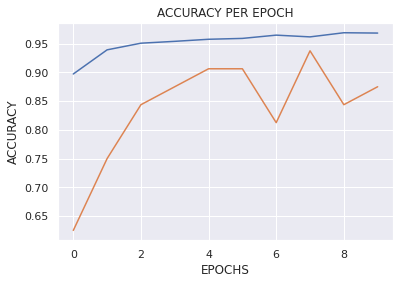

In [59]:
plt.plot(avg_train_accuracy_history , label = "Train")
plt.plot(avg_test_accuracy_history , label = "Test")
plt.title('ACCURACY PER EPOCH')
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.savefig('result.png')
plt.show()

This model was able to produce about 90 to 95% accuracy in different runs. This inconsistent result is due to model's random weight and bias initialization.Code to run in Google colab can be found here.You can also checkout tuning of pre-trained vgg16 model with pneumonia dataset here该模型能够在不同的运行中产生大约90%到95%的准确度。这种不一致的结果是由于模型的随机权重和偏差初始化。在谷歌colab中运行的代码可以在这里找到。你也可以在这里用肺炎数据集检查预训练的vgg16模型的调整